In [61]:
import numpy as np 
import pandas as pd 
import random 
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
from IPython.display import display
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Read The Dataset

In [62]:
train = pd.read_csv('C:/Users/souvik/Documents/capgemini/adult_income.csv')

In [63]:
train.shape

(48842, 15)

In [64]:
train.columns

Index([u'age', u'workclass', u'fnlwgt', u'education', u'educational-num',
       u'marital-status', u'occupation', u'relationship', u'race', u'gender',
       u'capital-gain', u'capital-loss', u'hours-per-week', u'native-country',
       u'income'],
      dtype='object')

In [65]:
train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [66]:
#only Numeric Data
train.describe()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [67]:
#statistics of target column
train['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [68]:
#Label Indexing the target column
train['income']=train['income'].map({'<=50K': 0, '>50K': 1})

In [69]:
train['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [70]:
train.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income              int64
dtype: object

In [71]:
#converting income target variable from int to object 
train["income"]= train["income"].astype(str) 

In [72]:
train.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

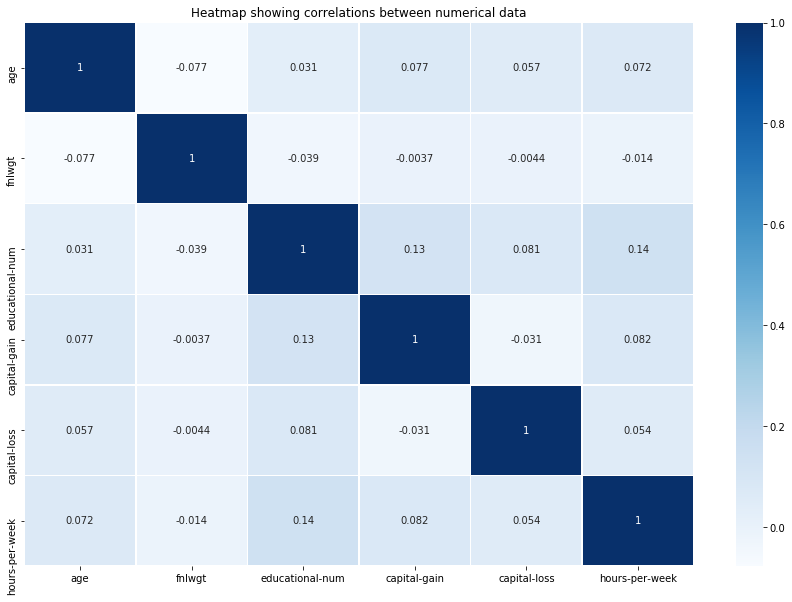

In [73]:
#correlation plots between the numeric variables
plt.figure(figsize=(15,10))  
sns.heatmap(train.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

There is no strong correlation among the numeric attributes.
There is neither strong positive nor strong negative correlation present in any variable .
The strongest correlation is present between capital gain and hours-per-week with Coefficient .082.(which is less than 0.1, it means that very small correlation among them).

In [74]:
# Finding Missing values 
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)


,Total,Percent
occupation,2809,5.751198
workclass,2799,5.730724
native-country,857,1.754637
income,0,0.000000
hours-per-week,0,0.000000
capital-loss,0,0.000000
capital-gain,0,0.000000
gender,0,0.000000
race,0,0.000000
relationship,0,0.000000


Keeping the target variable aside.
Since Occupation, WorkCLass and native-country has missing value less than 6% we will input them with the mode

In [75]:
train_y = train[['income']]

In [76]:
# Differentiate numerical features (minus the target) and categorical features and dropping target column

categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns
categorical_features = categorical_features.drop("income")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
train_num = train[numerical_features]
train_cat = train[categorical_features]


Numerical features : 6
Categorical features : 8


In [77]:
l=train_cat.filter(["occupation", "workclass","native-country"]).mode()
train_cat[["occupation", "workclass","native-country"]]=train_cat[["occupation", "workclass","native-country"]].fillna(value=l.iloc[0])


In [78]:
train = pd.concat([train_num, train_cat,train_y], axis = 1)
print("New number of features : " + str(train.shape[1]))

New number of features : 15


In [79]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
income,0,0.0
native-country,0,0.0
gender,0,0.0
race,0,0.0
relationship,0,0.0
occupation,0,0.0
marital-status,0,0.0
education,0,0.0
workclass,0,0.0
hours-per-week,0,0.0


In [80]:
# Dropping Redundant column. Dropping educational-num as we have a similar column like education

train = train.drop(["educational-num"], axis=1)
train.shape

(48842, 14)

In [81]:
#13 independent variable and 1 dependent variable
train.columns

Index([u'age', u'fnlwgt', u'capital-gain', u'capital-loss', u'hours-per-week',
       u'workclass', u'education', u'marital-status', u'occupation',
       u'relationship', u'race', u'gender', u'native-country', u'income'],
      dtype='object')

In [82]:
train.describe()


,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000


In [83]:
#to describe the categorical columns
train.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,0
freq,36705,15784,22379,8981,19716,41762,32650,44689,37155


# Univariate Analysis:

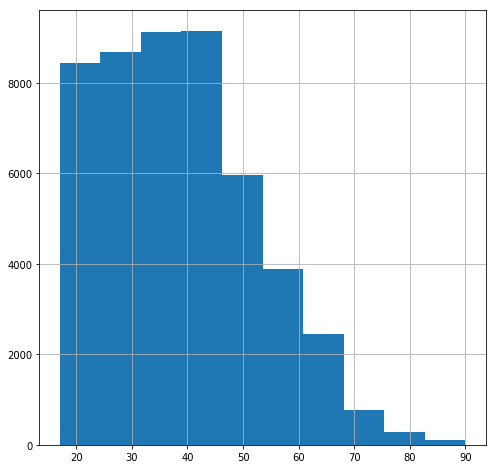

In [84]:

#Age

train['age'].hist(figsize=(8,8))
plt.show()

In [85]:
train[train["age"]>70].shape

(868, 14)


### The above histogram shows that :

#### "age" attribute is not symmetric.
####  it is right-skewed(But this is totally fine as younger adult earn wages not the older ones)
#### Minimum and Maximum age of the people is 17 and 90 respectively.
#### This dataset has fewer observations(868) of people's age after certain age i.e. 70 years.

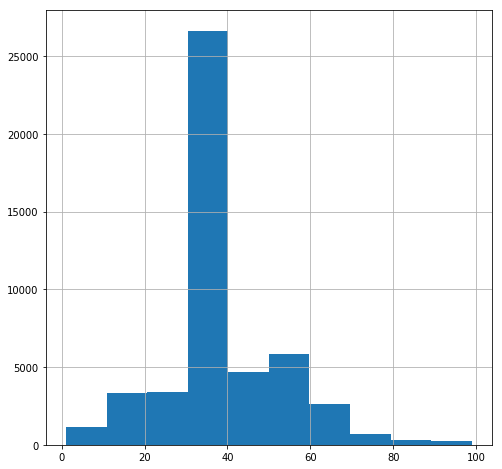

In [86]:
# Amount earned per week
train['hours-per-week'].hist(figsize=(8,8))
plt.show()

### This histogram of "hours-per-week" shows that:

### In this data the hours per week atrribute varies within the range of 1 to 99.
### Most people work 30-40 hours per week, they are roughly 27,000 people.
### There are also few people who works 80-100 hours per week and some less than 20 which is unusual.
### 75 percentage of the people spend 45 or less working hours per week.

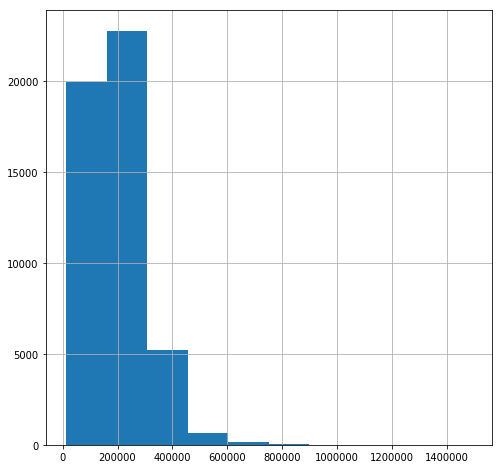

In [87]:
# Final Weight
train['fnlwgt'].hist(figsize=(8,8))
plt.show()

### The above histogram shows that :

### This is the sampling weight corresponding to the observations.
### The distribution of finalweight seems to be rightly skewed since mean(189664.1) is greater than median(178144.5).

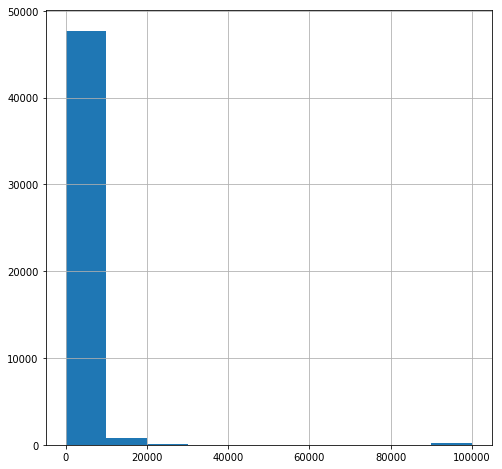

In [88]:
#capital Gain
train["capital-gain"].hist(figsize=(8,8))
plt.show()

### Description about distribution
 ### This histogram shows that most of the "capital-gain" values are centered on 0 and few on 10k and 99k.
### capital-gain is concentrated on the one particular value and other are spread with large standard deviation(7452.01).
### capital-gain shows that either a person has no gain or has gain of very large amount(10k or 99k).

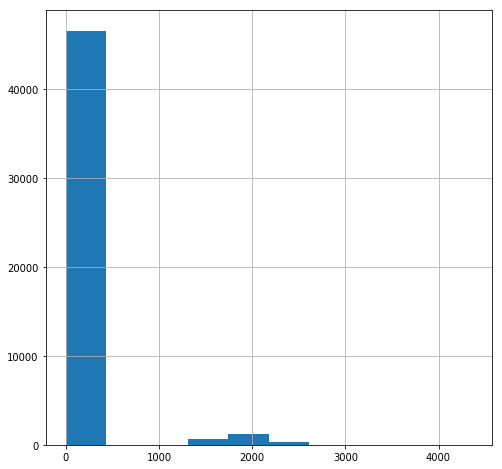

In [89]:
# Capital Loss
train["capital-loss"].hist(figsize=(8,8))
plt.show()

### Description about distribution
### This histogram shows that most of the "capital-loss" values are centered on 0 and only few are non zero(2282).
### This attribute is similar to the capital-gain i.e. most of the values are centered on 0(nearly 43000 of them)


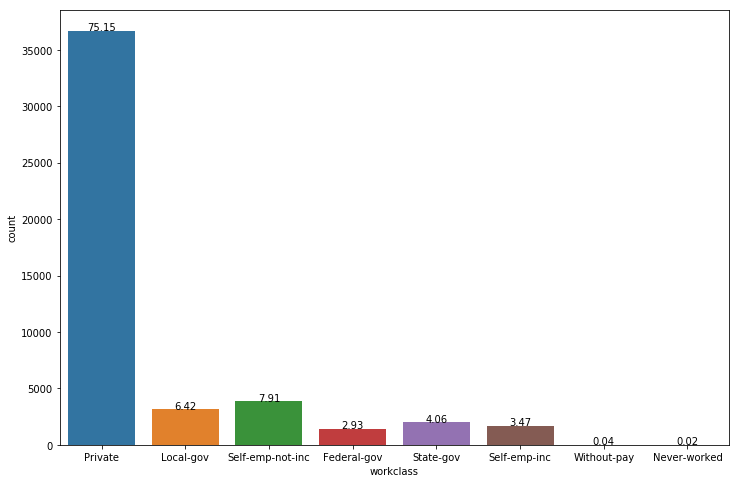

In [90]:
# work class distribution
plt.figure(figsize=(12,8))

total = float(len(train["income"]) )

ax = sns.countplot(x="workclass", data=train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### Summary distribution shows that:

There are 8 unique categories present in the worclass attribute.
Most of them belong to the private workclass(36705) i.e. 75.15%.
without-pay and never-worked has minimum count in workclass attribute(less than 1%).
There is huge imbalance in the categories of workclass attribute.

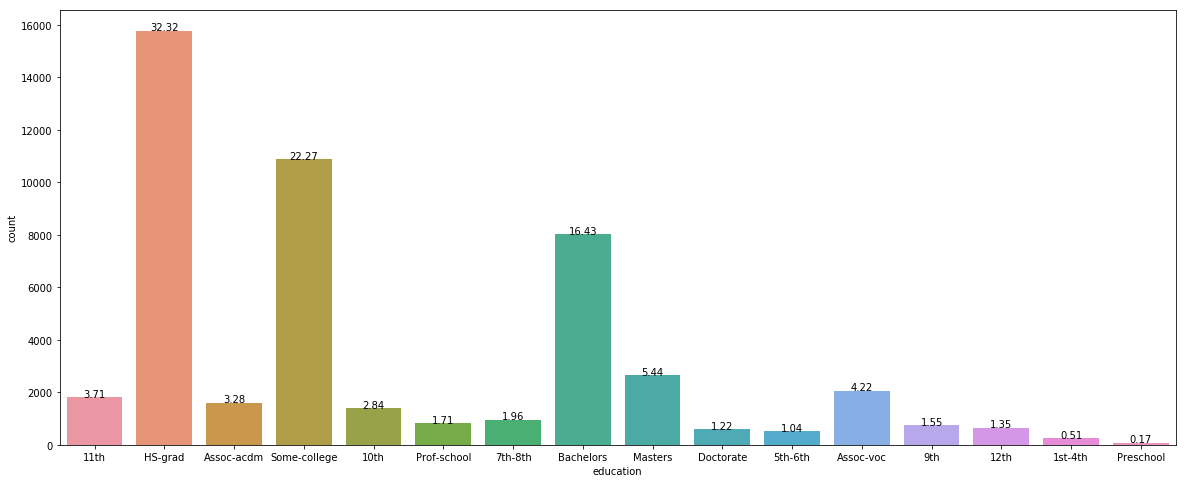

In [91]:
#Education
plt.figure(figsize=(20,8))
total = float(len(train["income"]) )

ax = sns.countplot(x="education", data=train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

There are 16 unique categories present in the education attribute.
Hs-grad has 32.32% of all the education attribute.
HS-grad (15784) has the maximum number of observations followed by some-college(10878) and Bachelors(8025).
Pre-school has minimum samples i.e. 83.

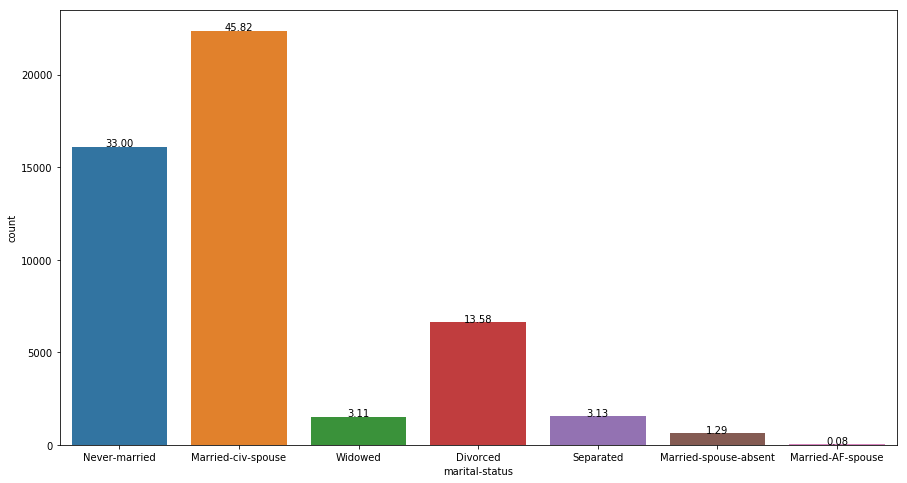

In [92]:
#marital status 
plt.figure(figsize=(15,8))
total = float(len(train) )

ax = sns.countplot(x="marital-status", data=train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### This marital-status attribute has 7 unique categories.
### Two of them are dominate over other categories(these are Never-married(33%) and married-civ-spouse(45.82%).
### Married-civ-spouse has maximum number of samples.
### Married-AF-spouse has minimum number of obs.

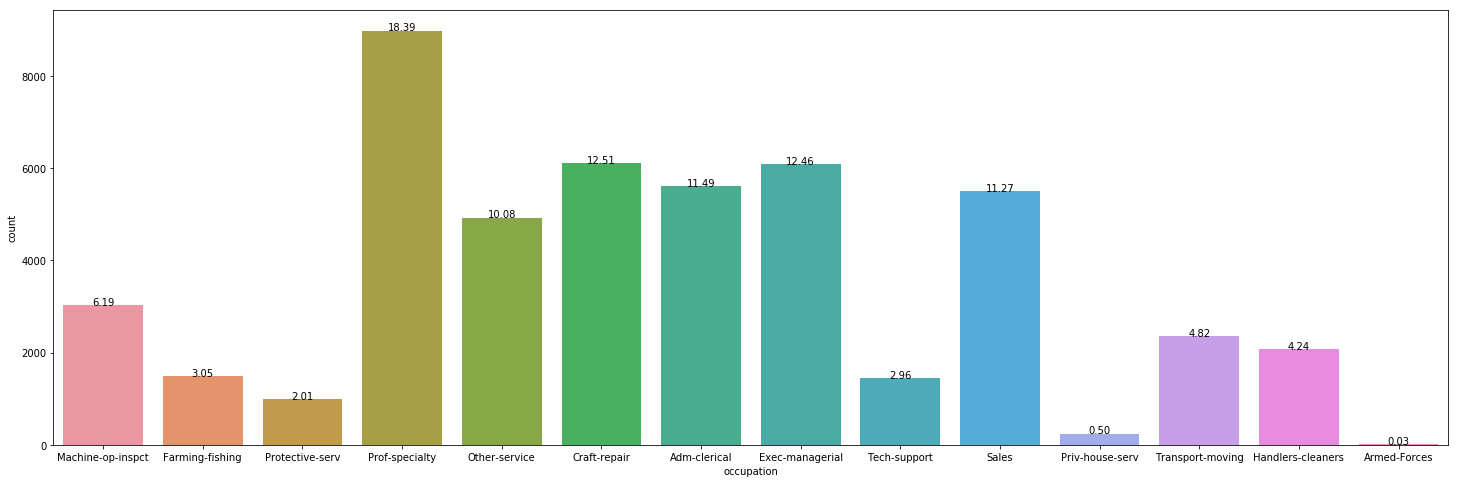

In [93]:
#occupation 
plt.figure(figsize=(25,8))
total = float(len(train) )

ax = sns.countplot(x="occupation", data=train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### There are 14 unique categories present in the occupation attribute.
### Prof-specialty has the maximum count(8981) but Craft-repair, Exec-managerial and Adm-clerical Sales has comparable number of observations.
### Armed-Forces has minimum samples in the occupation attribute.

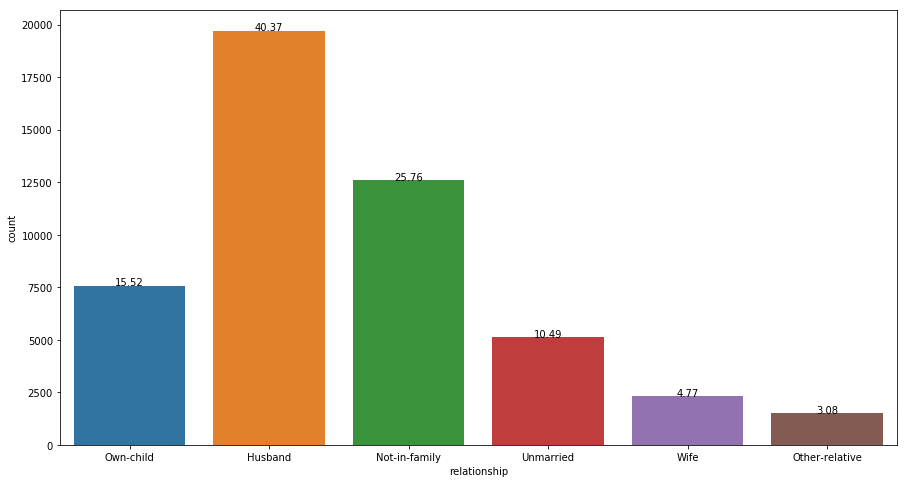

In [94]:
#Relationship
plt.figure(figsize=(15,8))
total = float(len(train) )

ax = sns.countplot(x="relationship", data=train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

 There are 6 unique categories in the relationship attribute.
 Husband has maximum percentage (40.37%) among all categories followed by not-in-family(25.76%)


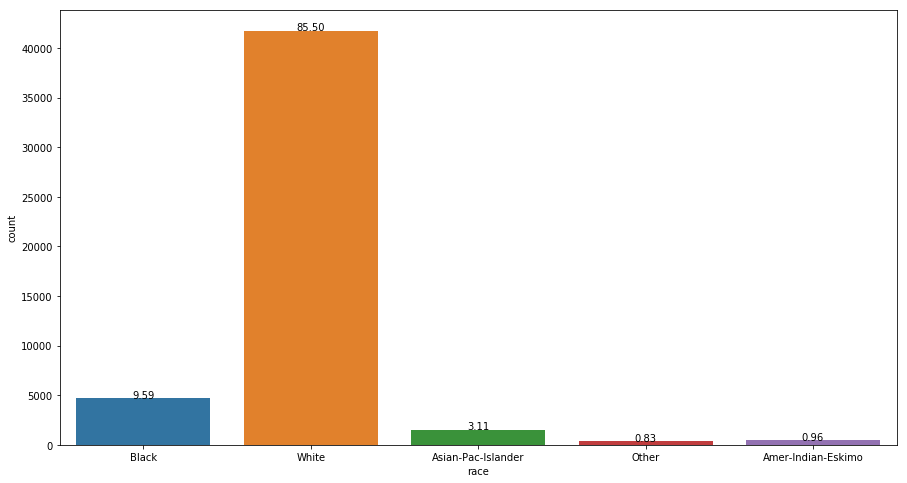

In [95]:
# Race
plt.figure(figsize=(15,8))
total = float(len(train) )

ax = sns.countplot(x="race", data=train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

There are 5 unique categories in the race attribute.
Most of them are "white" which is roughly 85.50%.
This dataset is totally bias toward the "white" race.
Second major race in the dataset is the "black" with just 9.59%.

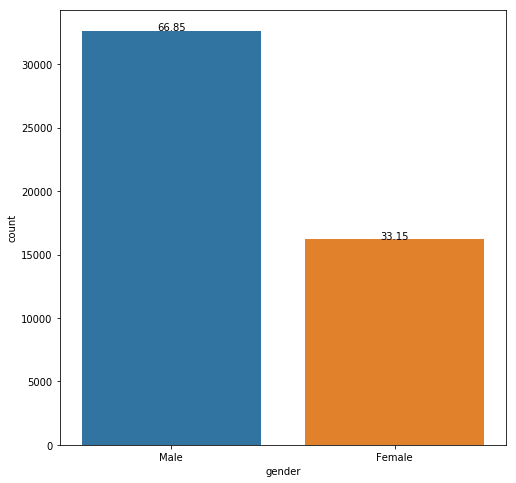

In [96]:
#Gender
plt.figure(figsize=(8,8))
total = float(len(train) )

ax = sns.countplot(x="gender", data=train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Gender has 2 unique categories(male and female).
But the frequency of male(32650) is higher than the female(16192) categories.
Distribution shows that this dataset is skewed toward the male with nearly 67%.

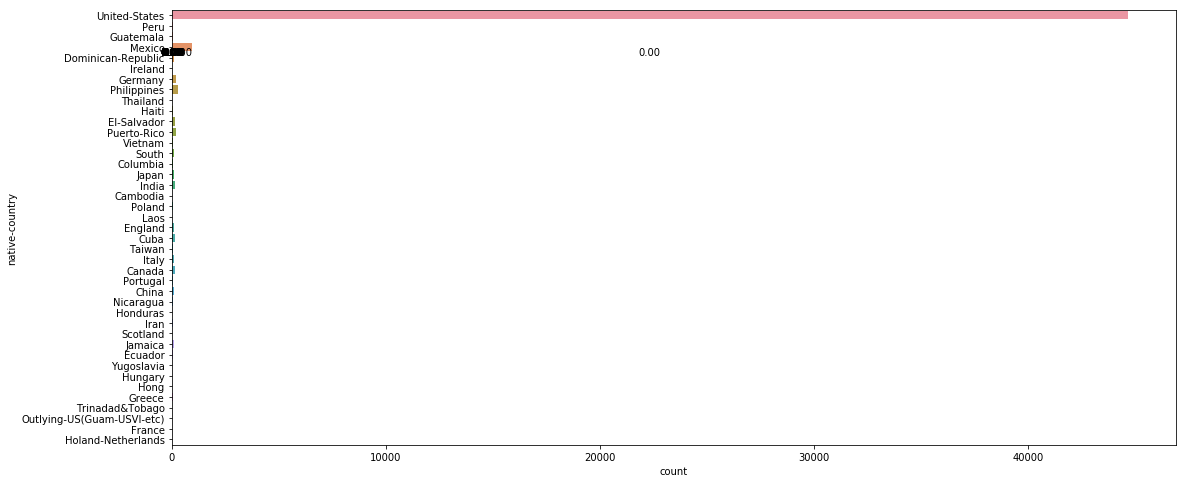

In [97]:
#Native-country
plt.figure(figsize=(18,8))
total = float(len(train) )

ax = sns.countplot(y="native-country", data=train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

This distribution explains that:

This dataset is taken from the US.
As 91.5% of them have native country America and others are immigrants.

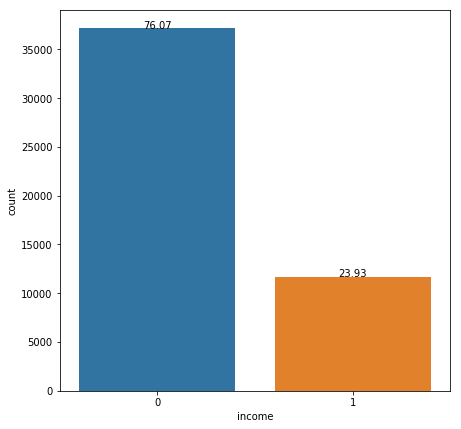

In [98]:
# Income 
plt.figure(figsize=(7,7))
total = float(len(train) )

ax = sns.countplot(x="income", data=train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

This dataset not balance , i.e. 23.93%of them are belong to income group 1 (who earns more than 50k) and 76% fall under the income group 0 (who earns less than 50k). We should definitely do a upsampling or a downsampling.

# Bivariate Analysis


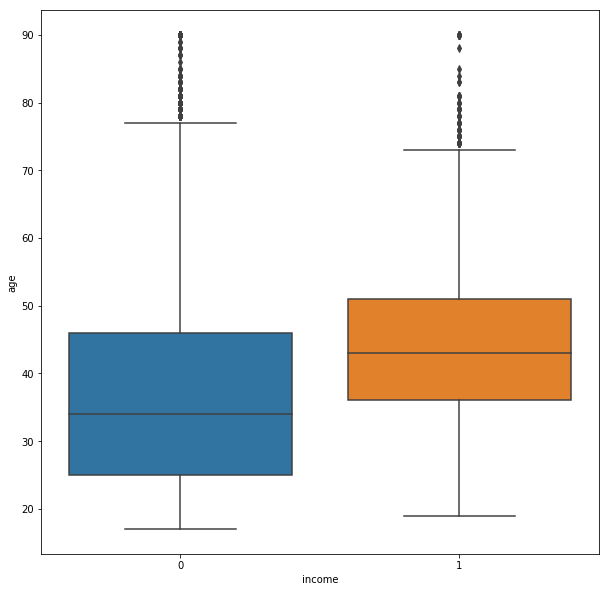

In [99]:
# Age with Income
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="age", data=train)
plt.show()

Mean age per category

In [100]:
    train[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)

,income,age
1,1,44.275178
0,0,36.872184


### Box plot analysis

The above bivariate boxplot shows :

Outliers present in both the income group(<=50k and >50k) wrt "age" attribute.
Income group(<=50k) has lower median "age"(34 year) than the Income group(>50k) which has median "age"(42 year).
Interquartile range(IQR) :
For Income group(<=50k) , IQR is between [25,46] (long range)
Middle 50% of the Age is spread over longer range for the income group who earn <=50k.

For Income group(>50k) , IQR is between [38,50] (shorter range)

### Hypothesis test (to test the relationship between income & Age )

#### Null Hypothesis :- there is no difference in Mean age of income group >50k and income group <=50k.
#### Alternate Hypothesis :- there is difference in Mean age of income group >50k and income group <=50k.

In [101]:
import random
from scipy import stats

data = train[(np.abs(stats.zscore(train["age"])) < 3)] 

income_1 = data[data['income']=='1']['age']  #<=50k
income_0 = data[data['income']=='0']['age']  #>50k

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

In [102]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

('ttest', 5.659044223450856)
('p value', 5.486234981067417e-08)
we reject null hypothesis


Using statistical analysis,

We can conclude that there is a significant difference in the mean ages of income group >50k and income group <=50k.
It means that age has some contribution to the distinguish income groups.

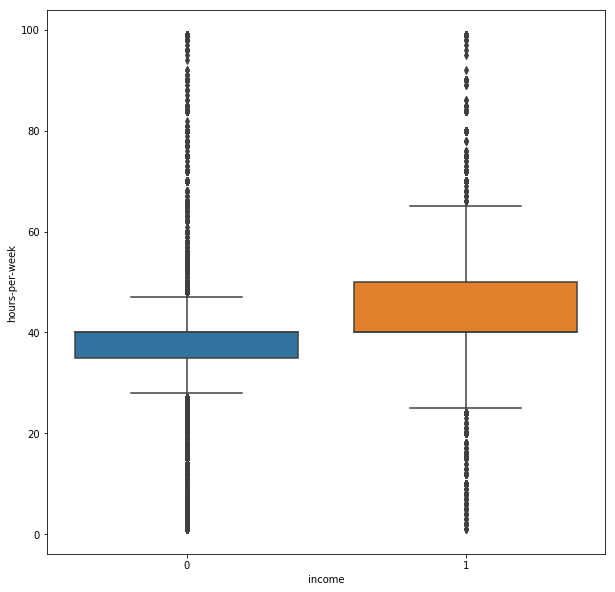

In [103]:
# Boxplot (Relationship with income)

fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="hours-per-week", data=train)
plt.show()

Bivariate Analysis with the boxplot shows that:

The median "hours-per-week" for Income group who earns >50k is greater than the Income group who earns <=50k.

Interpretation

Income group who earns >50k has spend ~44 "hours-per-week".(long hours)
Income group who earns <=50k has spend ~37 "hours-per-week".
The boxplot for Income group who earns <=50k has small range for minimum (q1-1.5 IQR) and maximum (q3+ 1.5 IQR) i.e.~[28,48].But the boxplot for Income group who earns >50k has large range for minimum (q1-1.5 IQR) and maximum (q3+ 1.5 IQR) i.e.~[23,68].

Interpretation

Income group who earns >50k have flexible working hours
More Outliers present in the Income group who earns <=50k.

### Hypothesis test (to test the relationship between income & hours-per-week )

#### Null Hypothesis :- there is no difference in Mean of income group >50k and income group <=50k.
#### Alternate Hypothesis :- there is difference in Mean of income group >50k and income group <=50k.

In [104]:
train = train[(np.abs(stats.zscore(train["hours-per-week"])) < 3)] 

income_1 = train[train['income']=='1']["hours-per-week"]
income_0 = train[train['income']=='0']["hours-per-week"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',format(pval, '.70f'))

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

('ttest', 5.268872614921778)
('p value', '0.0000003720774407086446101375386621978869072790985228493809700012207031')
we reject null hypothesis


We can conclude that there is difference in Mean of income group >50k and income group <=50k.
It means that hours-per-week has some contribution to the distinguish income groups.

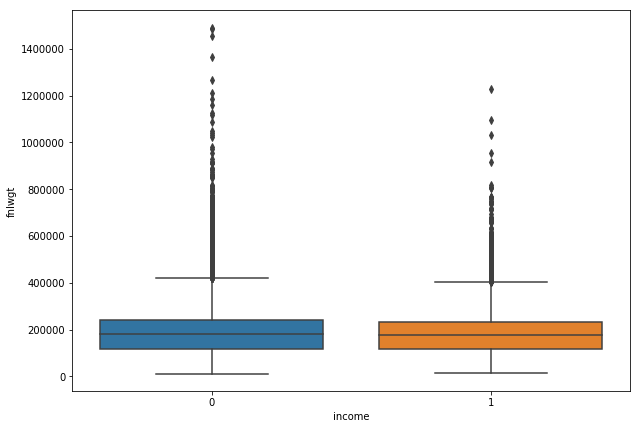

In [105]:
#Boxplot (Relationship with income)

plt.figure(figsize=(10,7))
sns.boxplot(x="income", y="fnlwgt", data=train)
plt.show()

Description about boxplot
As evident from the above plot, both income group has nearly same IQR and median is centered on 0.
Outliers are present in both the income groups.
It seems that the boxplot for final weight w.r.t income groups is similar except the number of outliers in income group who earns <=50k is more.

### Hypothesis test (to test the relationship between income & fnlwgt)

#### Null Hypothesis :- there is no difference in Mean of income group >50k and income group <=50k.
#### Alternate Hypothesis :- there is difference in Mean of income group >50k and income group <=50k.

In [106]:
train = train[(np.abs(stats.zscore(train["fnlwgt"])) < 3)] 

income_1 = train[train['income']=='1']["fnlwgt"]
income_0 = train[train['income']=='0']["fnlwgt"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print("p-value",pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

('ttest', 0.8708297340597627)
('p-value', 0.384901940525309)
we accept null hypothesis


We can conclude that there is no difference in Mean of income group >50k and income group <=50k.
It means that final weight has no contribution to the distinguish income group.

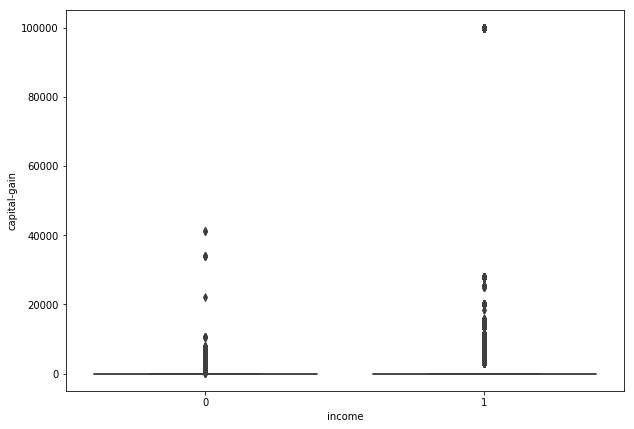

In [107]:
#Boxplot (Relationship with income)

plt.figure(figsize=(10,7))
sns.boxplot(x="income", y="capital-gain", data=train)
plt.show()

Most of the capital gains value is accumulated at 0 for both the income group 

### Hypothesis test (to test the relationship between income & capital gain )

#### Null Hypothesis :- there is no difference in Mean of income group >50k and income group <=50k.
#### Alternate Hypothesis :- there is difference in Mean of income group >50k and income group <=50k.

In [108]:
data = train[(np.abs(stats.zscore(train["capital-gain"])) < 3)] 

income_1 = train[train['income']=='1']["capital-gain"]
income_0 = train[train['income']=='0']["capital-gain"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print("p-value",pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

('ttest', 3.1543952397741526)
('p-value', 0.0021273425407710516)
we reject null hypothesis


We can conclude that there is difference in Mean of income group >50k and income group <=50k.

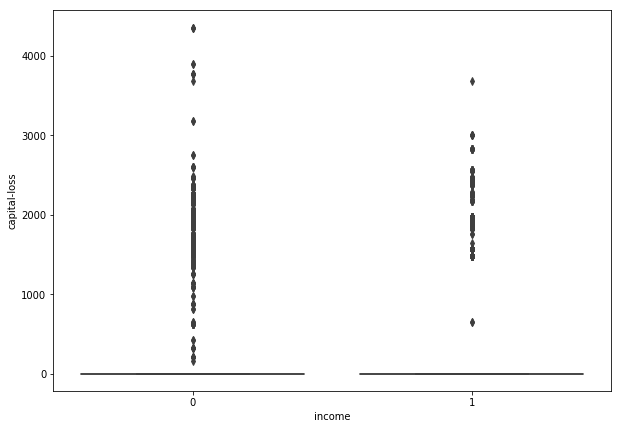

In [109]:
# Boxplot (Relationship with income)

plt.figure(figsize=(10,7))
sns.boxplot(x="income", y="capital-loss", data=train)
plt.show()

This boxplot is similar to the capital gain boxplot where most of the values are concentrated on 0

### Hypothesis test (to test the relationship between income & capital loss )

### Null Hypothesis :- there is no difference in Mean of income group >50k and income group <=50k.
### Alternate Hypothesis :- there is difference in Mean of income group >50k and income group <=50k.

In [110]:
income_1 = data[data['income']=='1']["capital-loss"]
income_0 = data[data['income']=='0']["capital-loss"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print("p-value",pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

('ttest', 2.3584237833315416)
('p-value', 0.019709207215722533)
we reject null hypothesis


We can conclude that there is no difference in Mean capital loss of income group >50k and income group <=50k.
It means that capital-loss is unable to seperate the income groups.

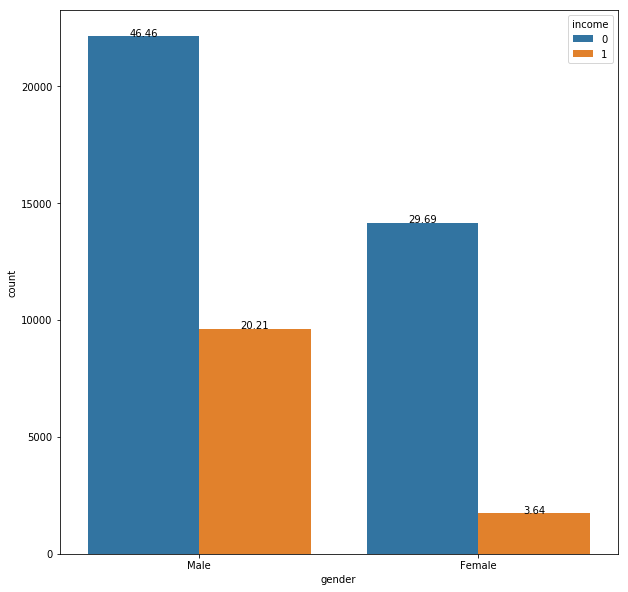

In [111]:
plt.figure(figsize=(10,10))
total = float(len(train) )

ax = sns.countplot(x="gender", hue="income", data=train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

# Multivariate Analysis between "income", "hours-per-week", "gender"

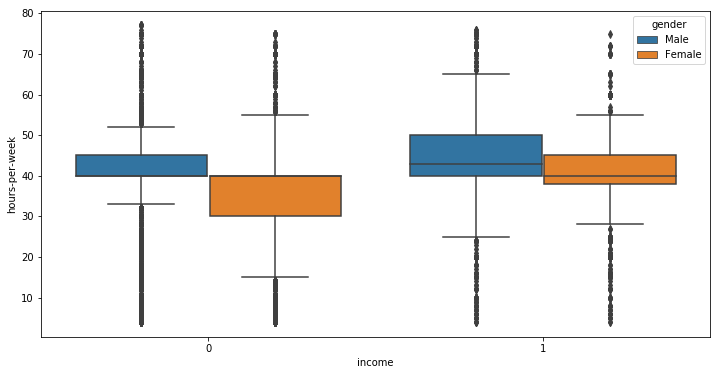

In [112]:
plt.figure(figsize=(12,6))
sns.boxplot(x='income',y ='hours-per-week', hue='gender',data=train)
plt.show()

The median "hours-per-week" for females is lower than the males in the Income group who earns <=50k.
Boxplot range for Income group who earns <=50k [minimum (q1-1.5 IQR) and maximum (q3+ 1.5 IQR)] i.e.
Male ~[32,52]
Female ~[17,57]
Interpretation

 Females have more flexible working hours per week in the income groups who earns <=50k
 
 Boxplot range for Income group who earns >50k [minimum (q1-1.5 IQR) and maximum (q3+ 1.5 IQR)] i.e.
Male ~[23,63]
Female ~[30,57]
Interpretation

 Males have more flexible working hours per week in the income groups who earns <=50k
 

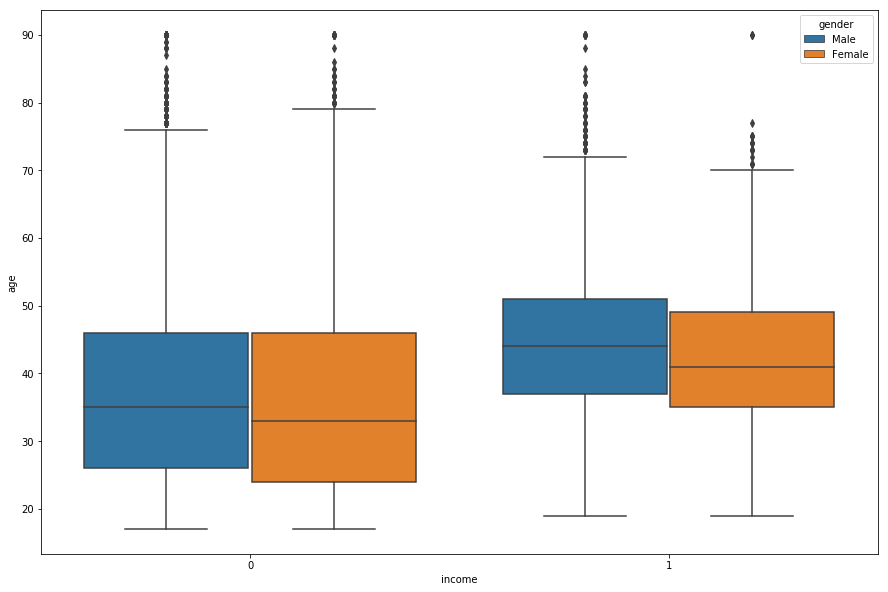

In [113]:
# Multivariate analysis between "income", "age", "gender"

plt.figure(figsize=(15,10))
sns.boxplot(x="income", y="age",hue="gender",data=train)
plt.show()

Multivariate analysis between "income", "age", "gender" shows that:

Median "age" of Females who earn less than 50k has very minute difference than the Median "age" of males who earn less than 50k.
But the Median "age" of Females who earn greater than 50k has age difference of 2-3years than the Median "age" of males who earn greater than 50k.

## Making new variable(capital_change)


In [114]:
train["capital_change"] = train["capital-gain"] - train["capital-loss"]
train["capital_change"].describe()

count    47663.000000
mean       977.913623
std       7399.991813
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_change, dtype: float64

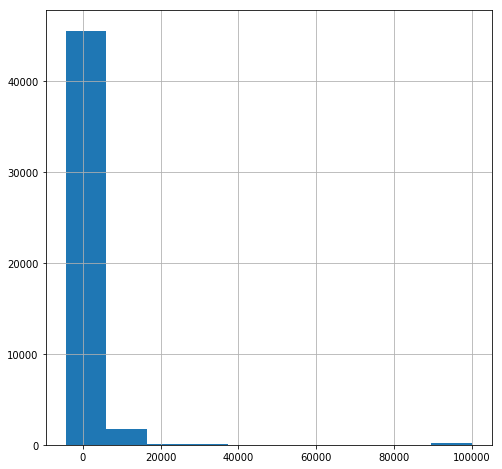

In [115]:
train["capital_change"].hist(figsize=(8,8))
plt.show()

The summary statistics and distribution of capital_change shows that:

It is similar summary stats and distribution to the capital gain and capital loss.
This suggest that , we may replace these two features with one feature called capital_change

### Conclusion of Complete EDA

1. Education num and education are giving similar information.
2. Using capital-gain and capital loss , we can make new variable called capital-change.

### Outliers Summary:

1. Capital gain of 99999 doesn't follow any pattern and from graph above it clearly distinguishes to be an outlier.
2. Our dataset has people with age 90 and working for 40 hours per week in government or private sectors which is rare.

### Other conclusion:

1. This dataset not balance , i.e. 76% of them are belong to income group 1 (who earns more than 50k) and 23.93% fall under the income group 0 (who earns less than 50k).

2. Females have more flexible working hours per week in the income groups who earns <=50k.

3. Males have more flexible working hours per week in the income groups who earns >50k.

4. The Median "age" of Females who earn greater than 50k has age difference of 2-3years(lower) than the Median "age" of males who earn greater than 50k.

5. Generally people can be seen working for 30 hours to 40 hours per week. 

6. Income group who earns >50k have flexible working hours.

